# Analysis of the Relationships between who the Manager is and Performance
dataset info:

Title: Human Resources Data Set

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

Date Accessed: October 5, 2023

In [75]:
# Importing our py libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [76]:
# Processing our dataset into a py dataframe
df = pd.read_csv('HRDataset_v14.csv')

In [77]:
# Completing initial emploratory data analysis of our dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [78]:
# Checking the list of categories for performance score
unique_ratings = list(df['PerformanceScore'].unique())
print(unique_ratings)

['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']


In [79]:
# Transforming our performance score into a scale from 1 to 4
# Createing a dictionary to map PerformanceScore values to integers
performance_mapping = {
    "Exceeds": 4,
    "Fully Meets": 3,
    "Needs Improvement": 2,
    "PIP": 1
}

# Maping the values and creating a new column 'PerformanceScore_Int'
df['PerformanceScore_Int'] = df['PerformanceScore'].map(performance_mapping)

# Printing the two features to see the result
print(df[['PerformanceScore', 'PerformanceScore_Int']].head())


  PerformanceScore  PerformanceScore_Int
0          Exceeds                     4
1      Fully Meets                     3
2      Fully Meets                     3
3      Fully Meets                     3
4      Fully Meets                     3


C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


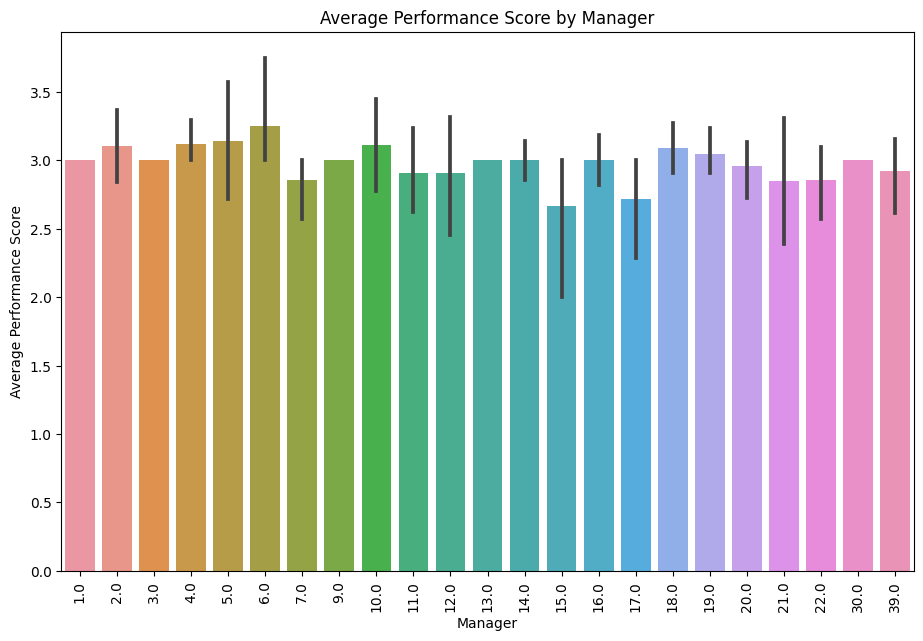

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


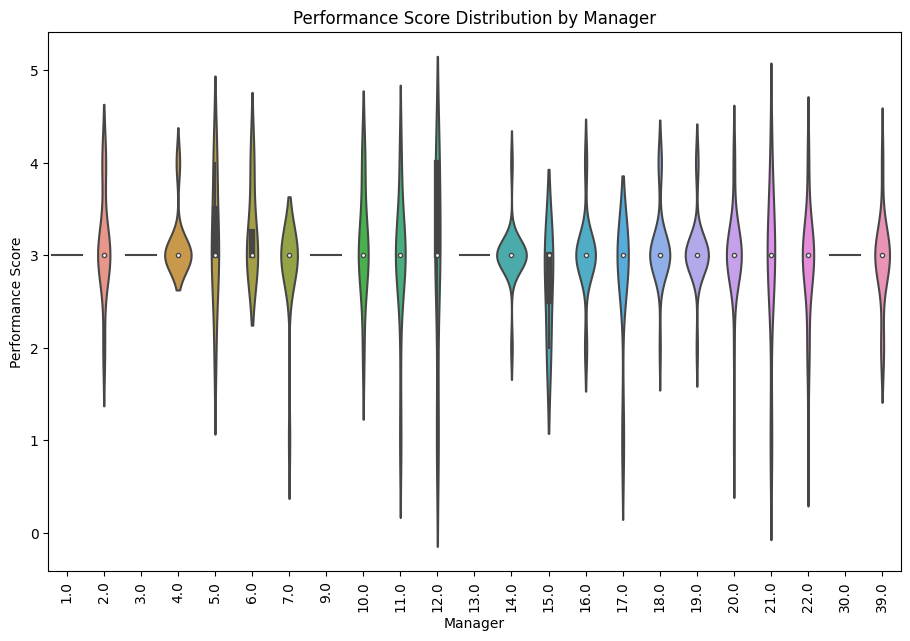

In [80]:
# Using a bar char and a violin plot to visualize the distributions of employee performance by manager

# Bar Chart
plt.figure(figsize=(11, 7))
sns.barplot(x='ManagerID', y='PerformanceScore_Int', data=df)
plt.xlabel('Manager')
plt.ylabel('Average Performance Score')
plt.title('Average Performance Score by Manager')
plt.xticks(rotation=90)
plt.show()

# Violin Plot
plt.figure(figsize=(11, 7))
sns.violinplot(x='ManagerID', y='PerformanceScore_Int', data=df)
plt.xlabel('Manager')
plt.ylabel('Performance Score')
plt.title('Performance Score Distribution by Manager')
plt.xticks(rotation=90)
plt.show()

In [81]:
# Testing hypothesis that there is no relationship between who the manager is and performance score

# Assuming you have a DataFrame 'df' with 'ManagerID' and 'PerformanceScore_Int' columns
contingency_table = pd.crosstab(df['ManagerID'], df['PerformanceScore_Int'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("There is a significant relationship between ManagerID and PerformanceScore_Int.")
else:
    print("There is no significant relationship between ManagerID and PerformanceScore_Int.")

Chi-Square Statistic: 67.79077411281659
p-value: 0.41589086023853816
There is no significant relationship between ManagerID and PerformanceScore_Int.
